## Levels of research evidence

<div style="text-align: center;"/>
<img src="./images/levels-of-evidence.svg" width=700 />
</div>

## Understanding research evidence

<div style="text-align: center;"/>
<img src="./images/4 types of evidence image news 11 2016.jpg" width=800 />
</div>

## Meta-analysis workflow

<div style="text-align: center;"/>
<img src="./images/srma-product-image-min.png" width=800 />
</div>

In [2]:
pacman::p_load(dplyr, ggplot2, ggraph, igraph, readr, litsearchr)

fig <- function(width, heigth) {
    options(repr.plot.width = width, repr.plot.height = heigth)
}

## Task

We want to retrieve journal articles about treating **phobias** with a combination of **medication** and **cognitive-behavioral therapy**.

## Workflow

1. <span style="color:red">**Writing the naїve search and importing results**</span>
2. Assembling and deduplicating results
3. Extracting and identifying keywords
4. Writing Boolean searches
5. Checking search strategy performance

<div style="text-align: center;"/>
<img src="images/workflow.jpg" width=400 />
</div>

## Step 1: Naїve search

[PubMed](https://pubmed.ncbi.nlm.nih.gov/) search query: `medication AND CBT AND phobia`

In [3]:
naive_results <- import_results(file = "./data/pubmed-medication-set.nbib")

Reading file ./data/pubmed-medication-set.nbib ... done


In [5]:
naive_results |> head(2)

,publication_type,language,status,author,author_full,address,date_created,date_revised,date_completed,date_added,⋯,PB,secondary_source_id,personal_name_as_subject,personal_name_as_subject_full,references_n,manuscript_id,uin,author_corporate,abstract_other,oabl
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Journal Article and Meta-Analysis and Review,eng,MEDLINE and ppublish,Bandelow B and Reitt M and Röver C and Michaelis S and Görlich Y and Wedekind D,"Bandelow, Borwin and Reitt, Markus and Röver, Christian and Michaelis, Sophie and Görlich, Yvonne and Wedekind, Dirk","Departments of aPsychiatry and Psychotherapy bMedical Statistics, University of Göttingen, Göttingen, Germany.",2015/05/02 06:00,20220317,20160226,2015/05/02 06:00,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Journal Article and Review,eng,MEDLINE and ppublish,Pelissolo A and Abou Kassm S and Delhay L,"Pelissolo, Antoine and Abou Kassm, Sandra and Delhay, Lauriane","AP-HP, Psychiatry Department, Hôpitaux Universitaires Henri-Mondor, Faculté de médecine, Créteil, France and Faculty of Medical Sciences, Psychiatry Department, Lebanese University, Beirut, Lebanon and AP-HP, Psychiatry Department, Hôpitaux Universitaires Henri-Mondor, Créteil, France.",2019/09/11 06:00,20221207,20200907,2019/09/11 06:00,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
naive_results |> names()

[1] "publication_type"              "language"                     
 [3] "status"                        "author"                       
 [5] "author_full"                   "address"                      
 [7] "date_created"                  "date_revised"                 
 [9] "date_completed"                "date_added"                   
[11] "date_published"                "publication_history_status"   
[13] "title"                         "journal"                      
[15] "journal_abbreviated"           "source"                       
[17] "volume"                        "issue"                        
[19] "pages"                         "abstract"                     
[21] "mesh_terms"                    "mesh_date"                    
[23] "article_id"                    "pubmed_id"                    
[25] "nlm_id"                        "registry_number"              
[27] "place_published"               "location_id"                  
[29] "subset"                        "own"                          
[31] "author_id"                     "date_published_elec"          
[33] "keywords"                      "term_owner_other"             
[35] "pubmed_central_identitfier"    "cin"                          
[37] "cois"                          "ein"                          
[39] "grant_number"                  "title_transliterated"         
[41] "copyright_info"                "uof"                          
[43] "title_book"                    "collection_title"             
[45] "PB"                            "secondary_source_id"          
[47] "personal_name_as_subject"      "personal_name_as_subject_full"
[49] "references_n"                  "manuscript_id"                
[51] "uin"                           "author_corporate"             
[53] "abstract_other"                "oabl"

## Step 2: Collect potential search terms

### Keywords

In [7]:
extract_terms(keywords = naive_results[, "keywords"], method="tagged") %>% 
  tibble(keyword = .) |> nrow()

[1] 44

In [29]:
extract_terms(keywords = naive_results[, "keywords"], method="tagged", min_freq = 5, min_n = 1, max_n = 2) %>% 
  tibble(keyword = .) |>
  head(20)

keyword
<chr>
agoraphobia
anxiety
anxiety disorders
cbt
children
cognitive-behavioral therapy
comorbidity
meta-analysis
panic disorder


### Titles and/or abstracts

In [10]:
extract_terms(text = naive_results[, "title"], method = "fakerake", min_freq = 3, min_n = 1, max_n = 2) %>%
  tibble(title_phrase = .) |>
  head()

title_phrase
<chr>
adolescent
adolescents
adults
agoraphobia
anxiety
anxiety disorder


In [15]:
my_stopwords <- read_lines("./data/stopwords.txt")
all_stopwords <- c(get_stopwords("English"), my_stopwords)

In [16]:
my_stopwords %>%
  tibble(stopword = .) |>
  head(10)

stopword
<chr>
advances
analyse
analysed
analyses
analysing
analysis
analyze
analyzes
analyzed


In [37]:
all_stopwords %>%
  tibble(stopword = .) |>
  head(10)

stopword
<chr>
a
a's
able
about
above
according
accordingly
across
actually


### Combine keywords and title phrases

In [17]:
keywords <- extract_terms(keywords = naive_results[, "keywords"], method = "tagged", min_n = 1)

In [18]:
title_terms <- extract_terms(text = naive_results[, "title"],
                             method = "fakerake",
                             min_freq = 3, min_n = 2,
                             stopwords = all_stopwords)

In [19]:
terms <- unique(keywords, title_terms)

In [24]:
terms %>%
  tibble(term = .) |>
  head(10)

term
<chr>
adherence
adolescent
adolescents
agoraphobia
antidepressant
anxiety
anxiety disorder
anxiety disorders
autism


## Step 3: Co-occurrence network analysis

In [25]:
docs <- paste(naive_results[, "title"], naive_results[, "abstract"])
dfm <- create_dfm(elements = docs, features = terms)

In [26]:
dfm[1:5, 1:5]

adherence,adolescent,adolescents,agoraphobia,antidepressant
0,0,0,0,1
0,0,0,0,0
0,1,1,0,0
0,0,0,0,0
0,0,0,0,1


In [27]:
net <- create_network(dfm, min_studies = 3)

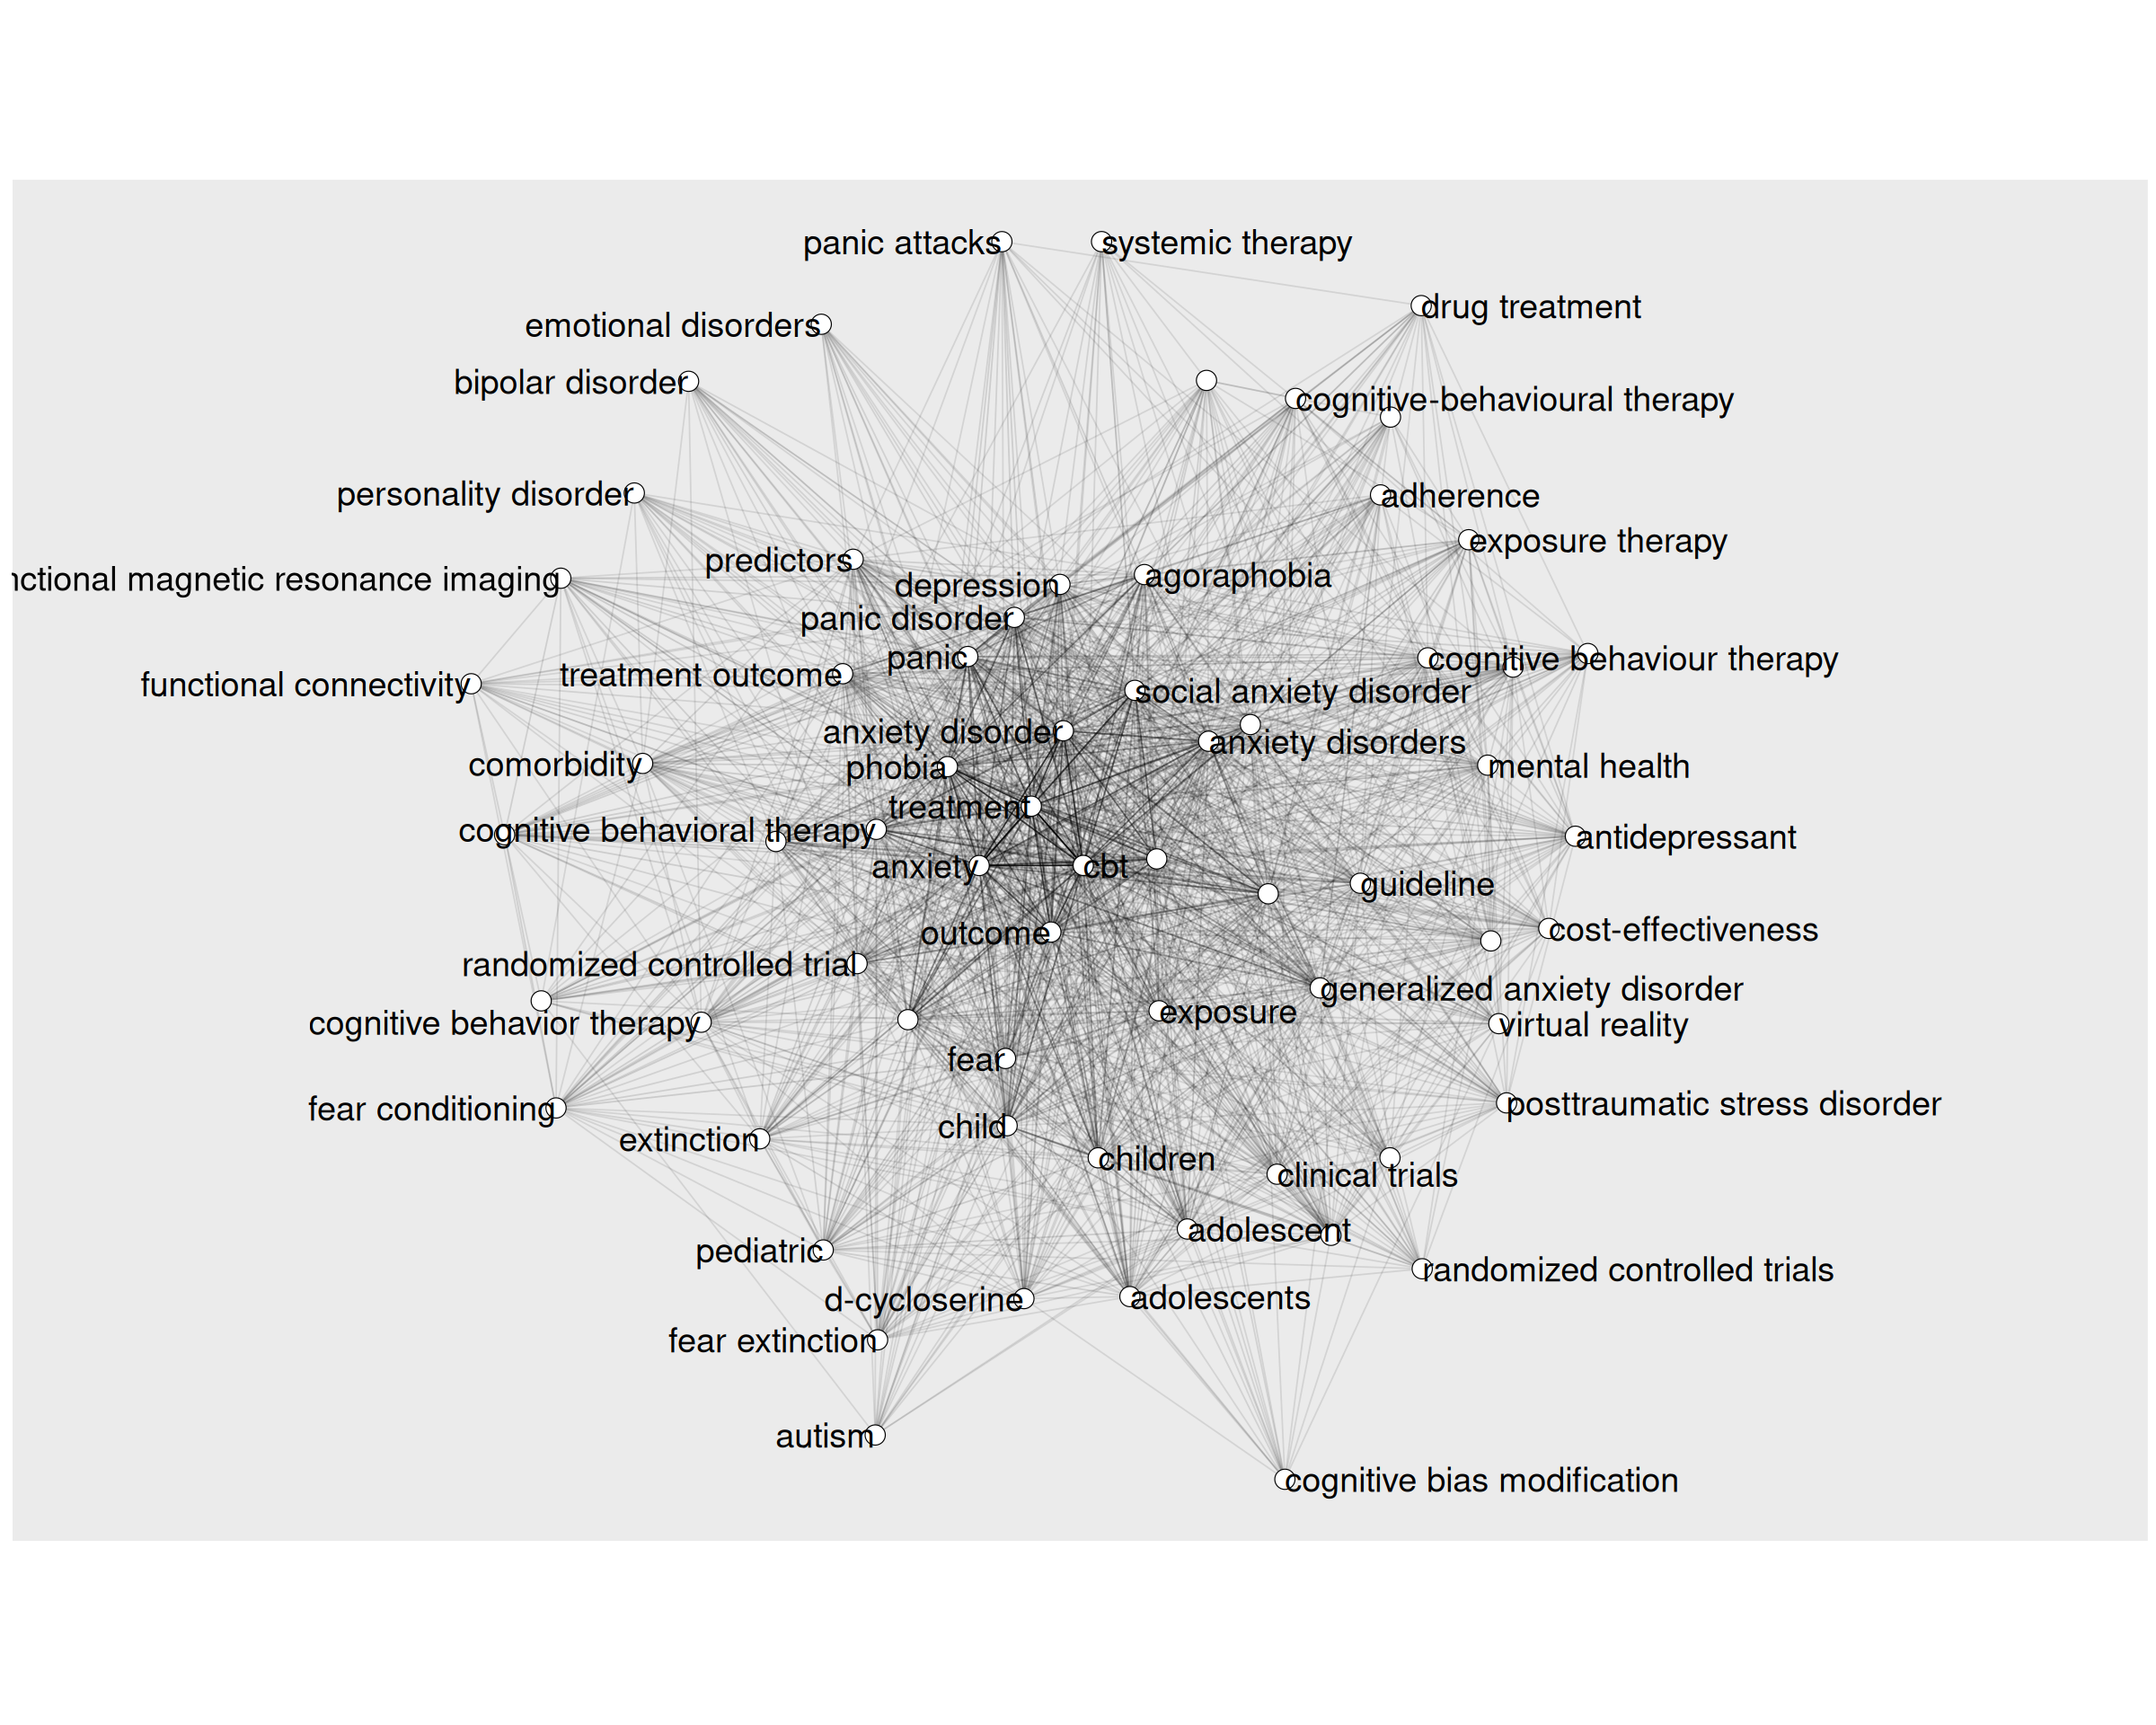

In [29]:
fig(20, 16)

ggraph(net, layout="stress") +
  coord_fixed() +
  expand_limits(x = c(-2, 2)) +
  geom_edge_link(aes(alpha = weight)) +
  geom_node_point(shape = "circle filled", fill = "white", size = 6) +
  geom_node_text(aes(label = name), hjust = "outward", check_overlap = TRUE, size = 8) +
  guides(edge_alpha = FALSE, scale = "none")

1. Phrases that appear near the center of the graph and that are linked to each other by darker lines are more important for our overall topic.
2. Phrases that appear at the periphery of the graph and linked to it only by faint lines are not closely related to any other terms. These are mostly tangential terms that are related to, but not part of, our main topic.

### Prune network

In [30]:
strengths <- strength(net)

tibble(term = names(strengths), strength = strengths, row.names = NULL) %>%
  mutate(rank = rank(strength, ties.method = "min")) %>%
  arrange(strength) -> term_strengths

In [31]:
term_strengths |>
  arrange(-strength) |>
  head(15)

term,strength,rank
<chr>,<dbl>,<int>
cbt,2014,66
treatment,1903,65
anxiety,1780,64
anxiety disorder,1445,63
phobia,1415,62
outcome,1192,61
social anxiety,941,60
anxiety disorders,918,59
panic,876,58


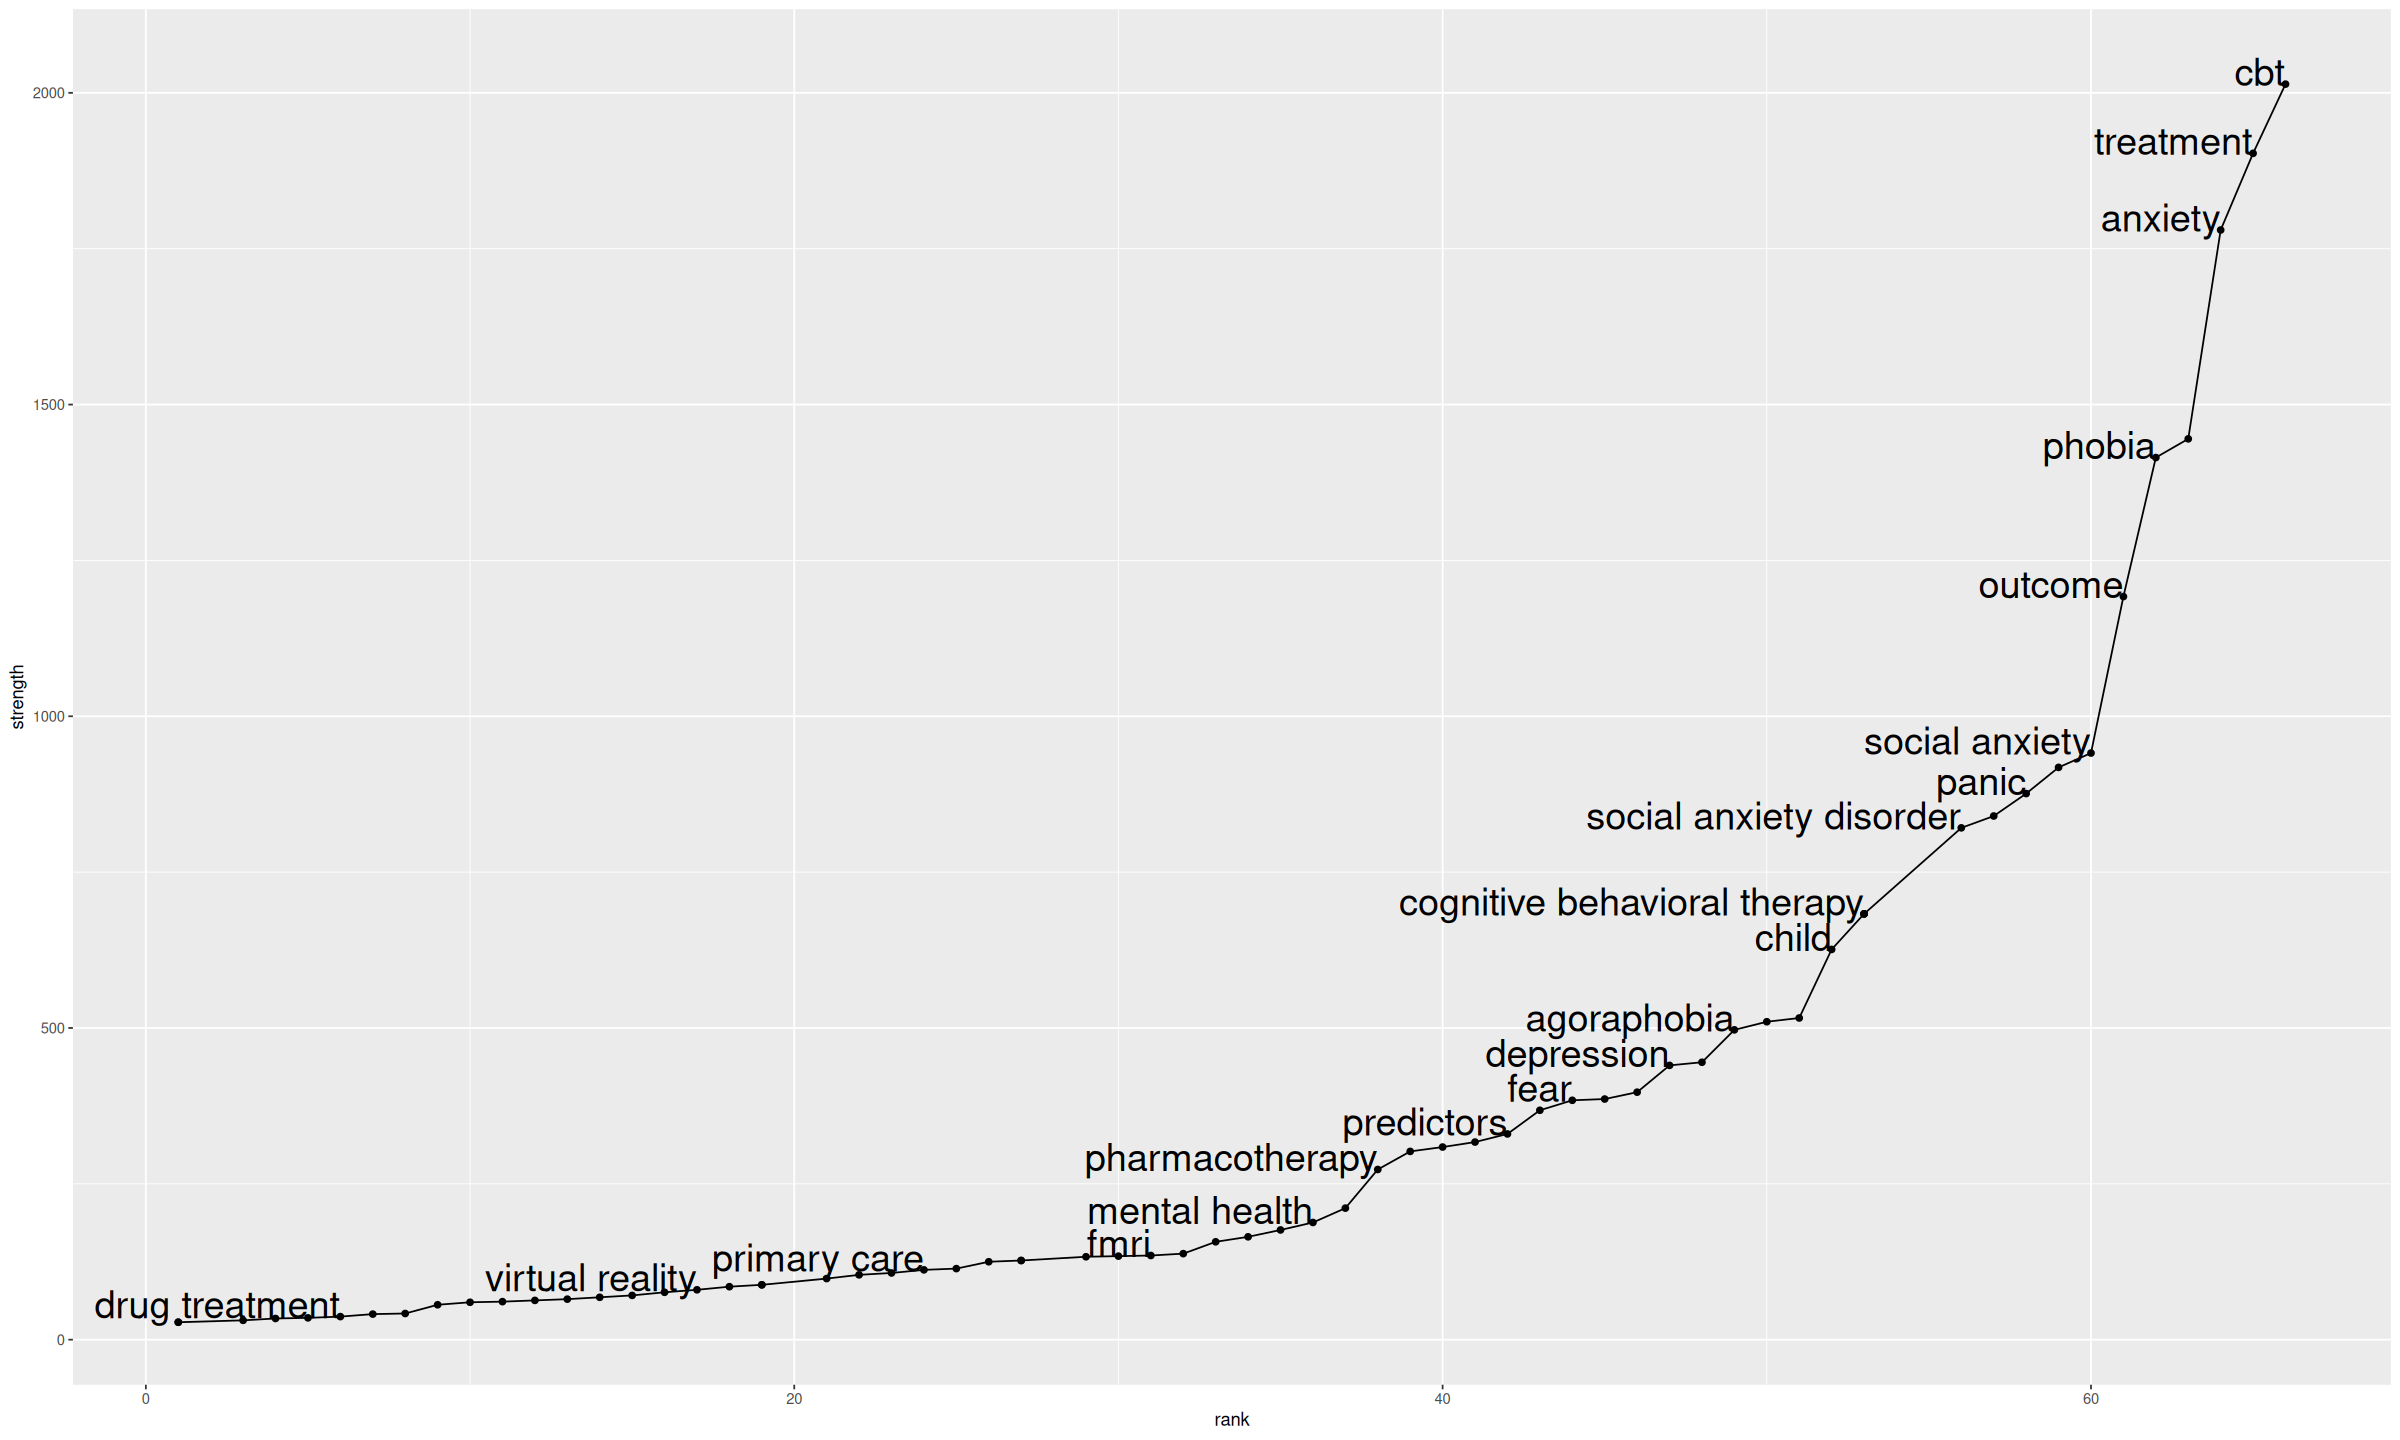

In [32]:
fig(20, 12)

ggplot(term_strengths, aes(x = rank, y = strength, label = term)) +
  geom_line() +
  geom_point() +
  geom_text(data = filter(term_strengths, rank > 5), hjust = "right", nudge_y = 20, check_overlap = TRUE, size = 8) -> plt

plt

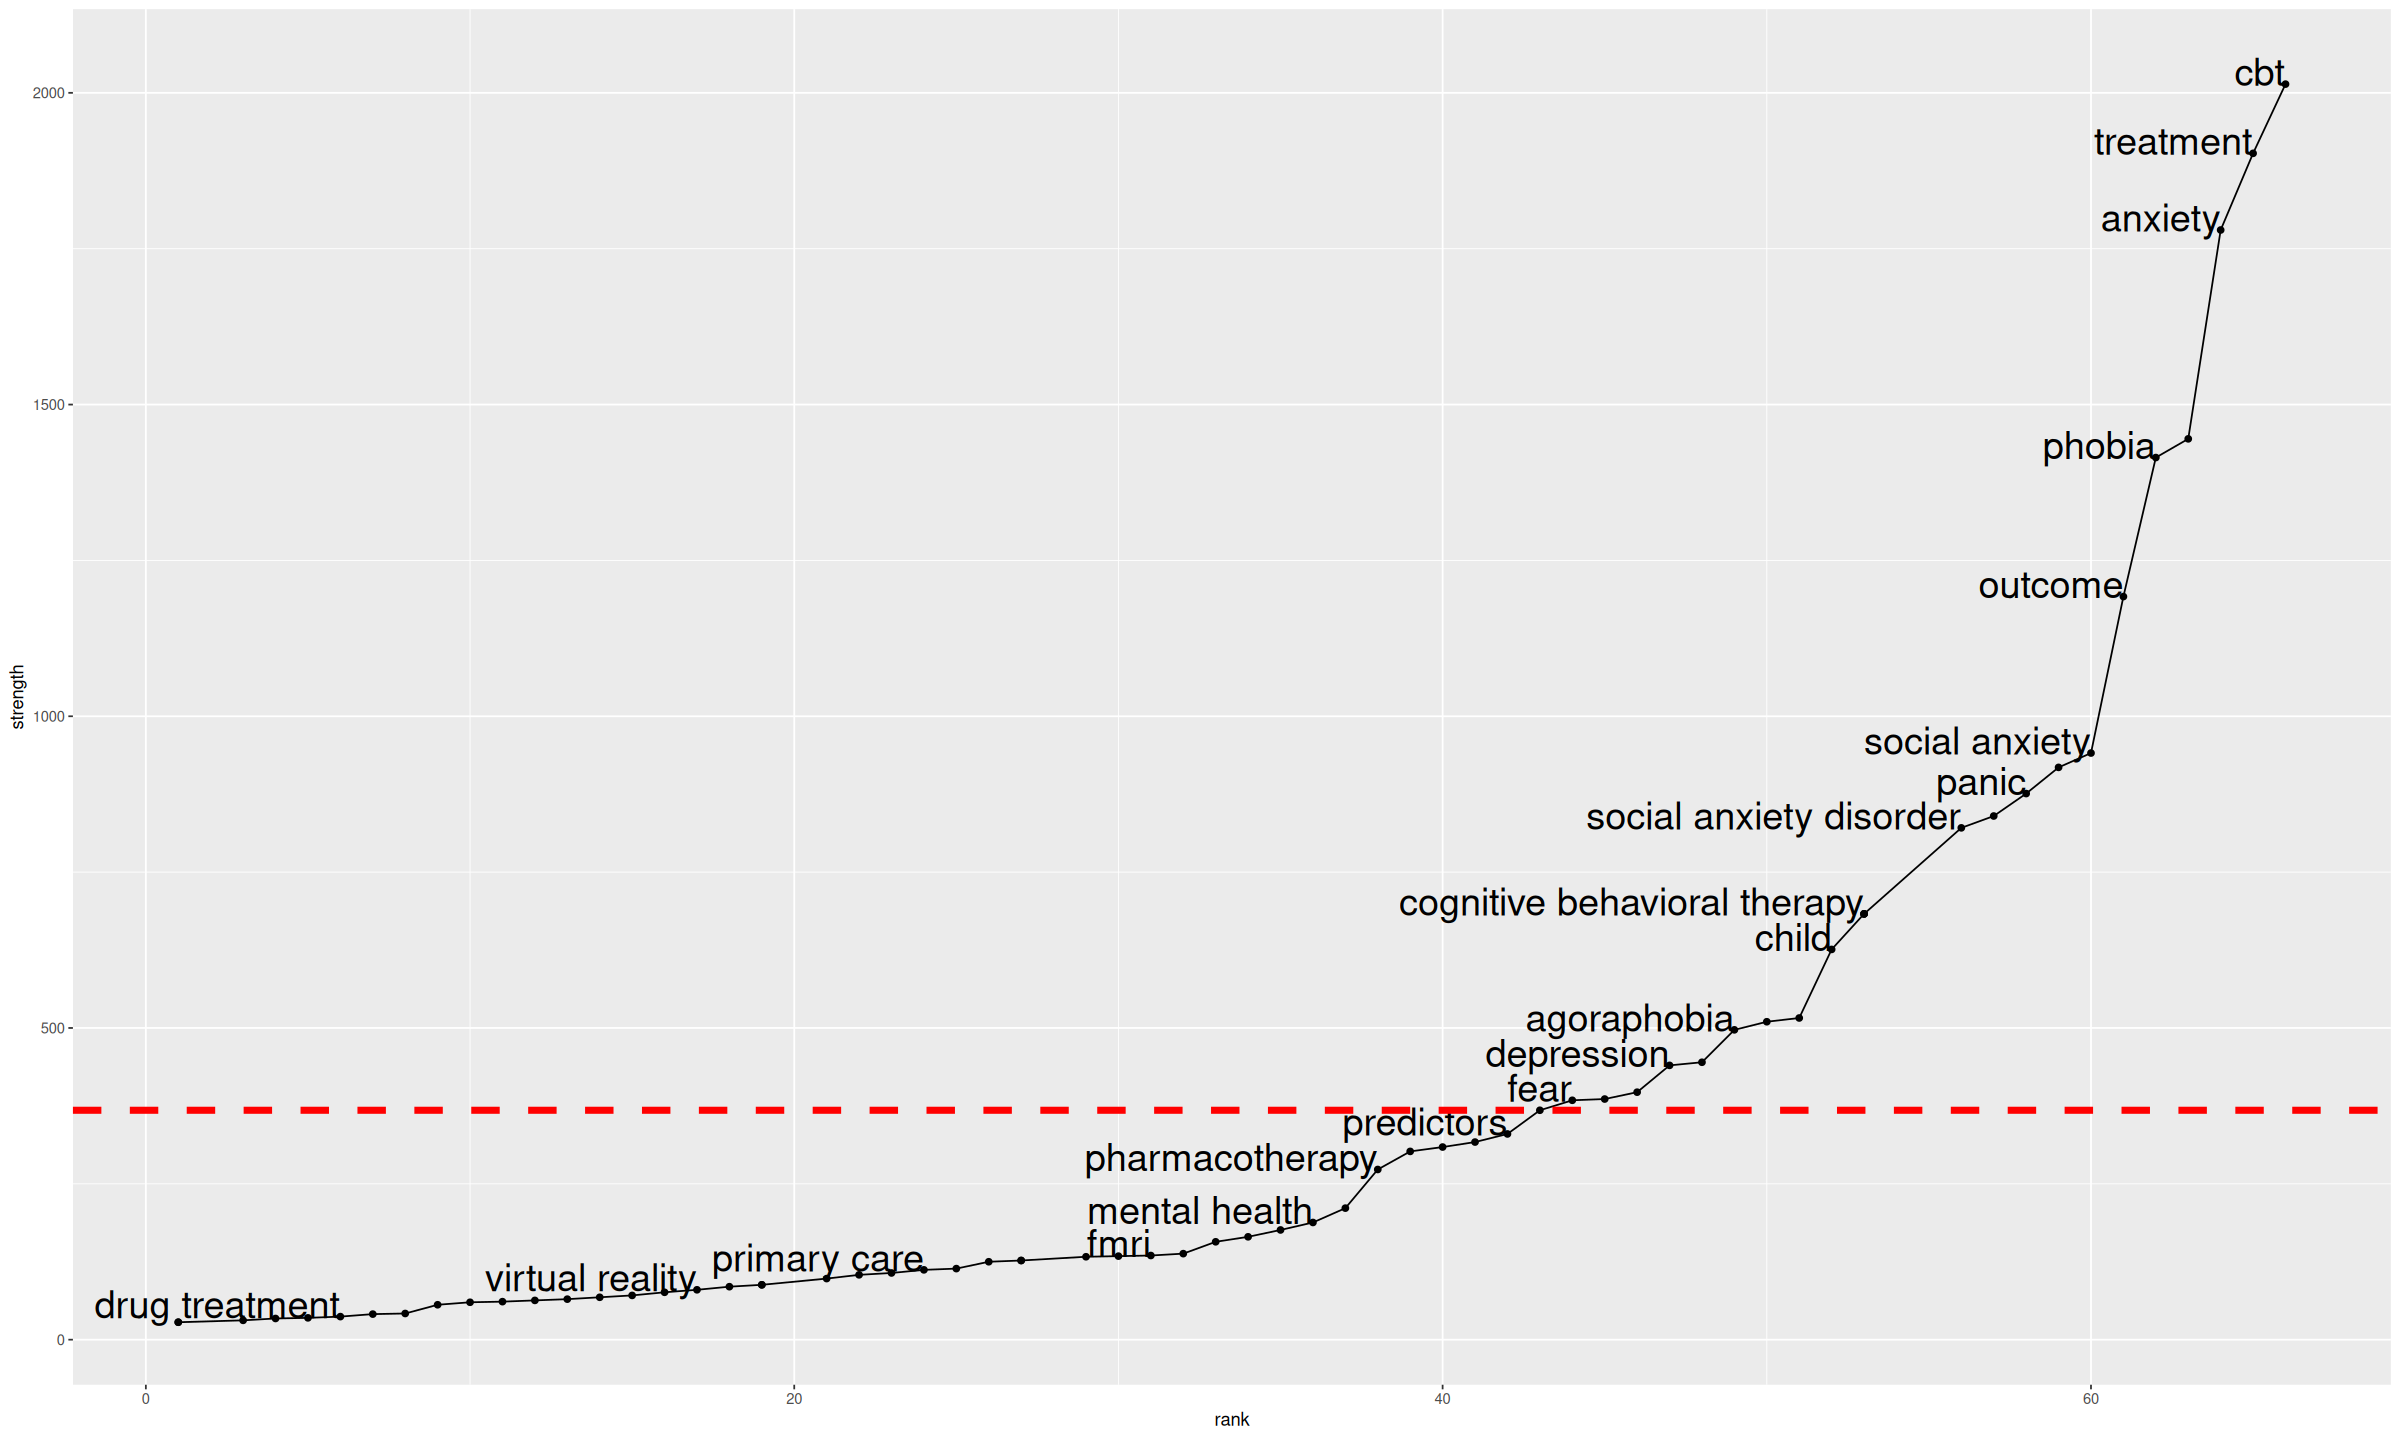

In [33]:
cutoff_h1 <- find_cutoff(net, method = "cumulative", percent = 0.8)

plt +
  geom_hline(yintercept = cutoff_h1, linetype = "dashed", linewidth = 2, colour = "red")

In [34]:
reduce_graph(net, cutoff_h1) |>
  get_keywords() %>%
  tibble(term = .)

term
<chr>
adolescent
agoraphobia
anxiety
anxiety disorder
anxiety disorders
cbt
child
children
cognitive behavioral therapy


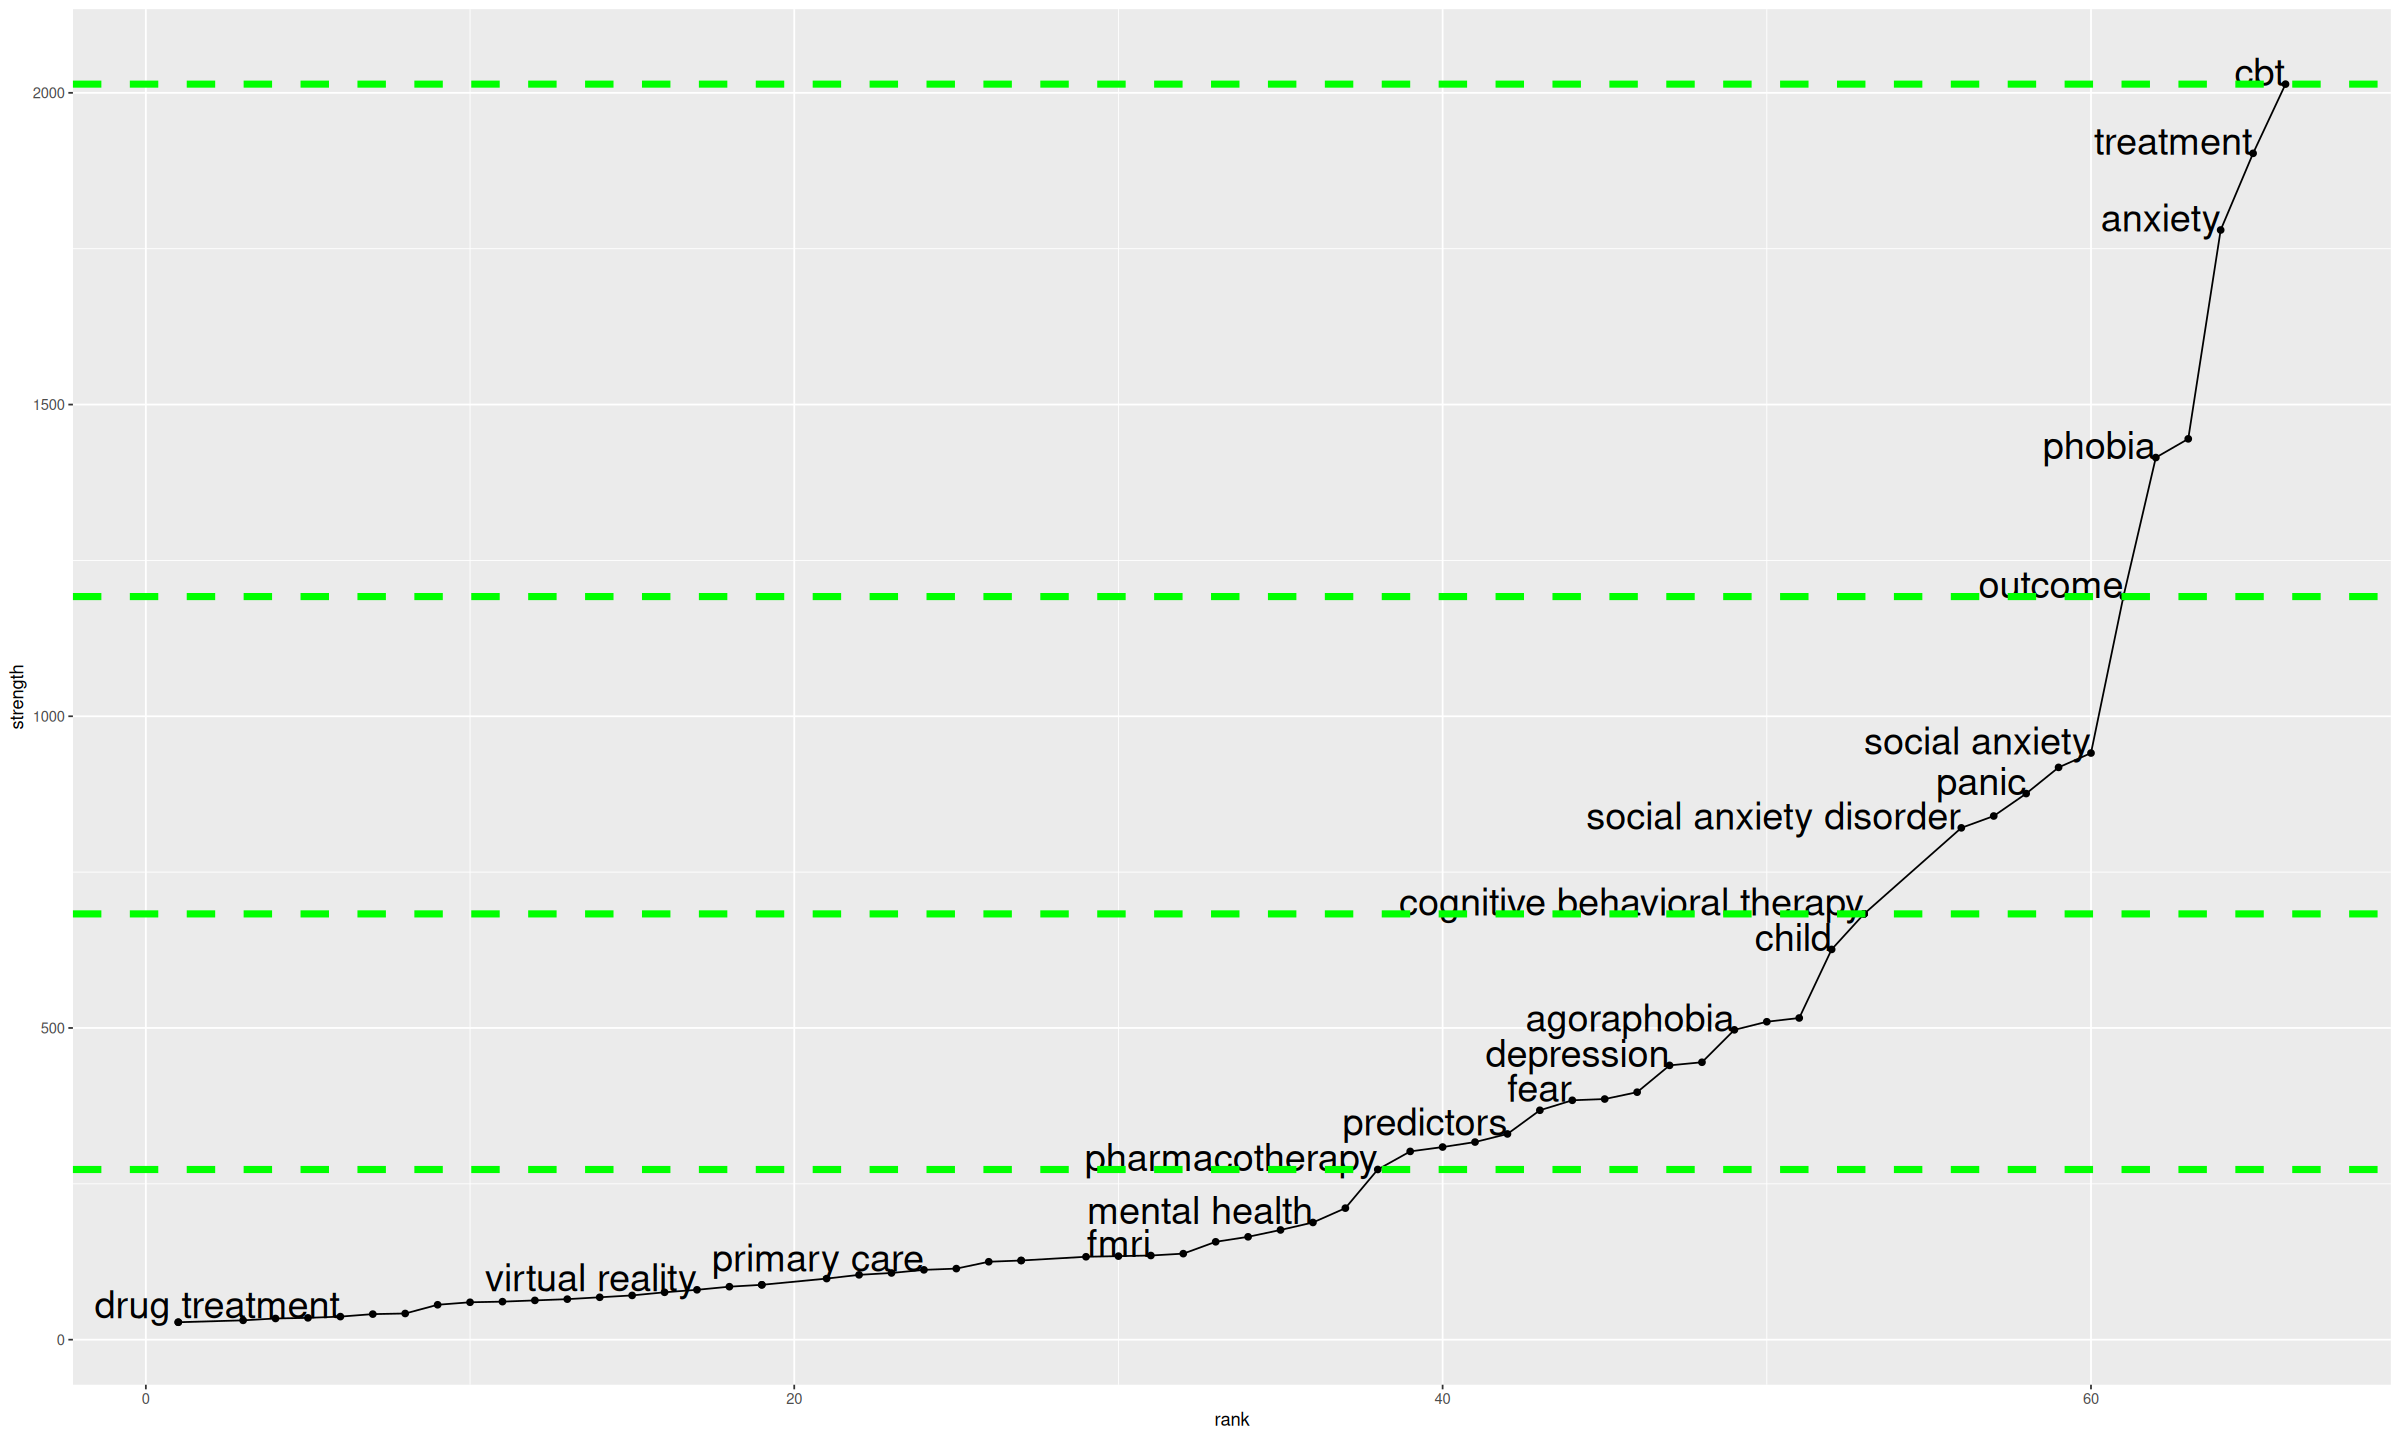

In [36]:
cutoff_h2 <- find_cutoff(net, method = "changepoint", knot_num = 3)

plt +
  geom_hline(yintercept = cutoff_h2, linetype = "dashed", linewidth = 2, colour = "green")

In [37]:
reduce_graph(net, cutoff_h2[2]) ##|>
  # get_keywords() %>%
  # tibble(term = .)

term
<chr>
anxiety
anxiety disorder
anxiety disorders
cbt
cognitive behavioral therapy
cognitive-behavioral therapy
outcome
panic
panic disorder


In [38]:
selected_terms <- reduce_graph(net, cutoff_h2[2])

In [39]:
V(selected_terms)$name %>%
  tibble(term = .)

term
<chr>
anxiety
anxiety disorder
anxiety disorders
cbt
cognitive behavioral therapy
cognitive-behavioral therapy
outcome
panic
panic disorder


### Group terms

In [40]:
grouped_terms <- list(cbt = c("cbt", "cognitive behavioral therapy", "cognitive-behavioral therapy"),
                      medication = c("pharmacotherapy", "medication"),
                      phobia = c("anxiety", "anxiety disorder", "panic"))

grouped_terms

$cbt
[1] "cbt"                          "cognitive behavioral therapy"
[3] "cognitive-behavioral therapy"

$medication
[1] "pharmacotherapy" "medication"     

$phobia
[1] "anxiety"          "anxiety disorder" "panic"

In [41]:
write_search(grouped_terms, languages="English", exactphrase = TRUE, stemming = FALSE, closure = "left", writesearch = FALSE)

[1] "English is written"


[1] "((cbt OR \"cognitive behavioral therapy\" OR \"cognitive-behavioral therapy\") AND (pharmacotherapy OR medication) AND (anxiety OR panic))"